<h1><center>Anomaly Detection with KNN</center></h1>
<h2><center>M. Esmali, PhD</center></h2>


## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

## Import Data from CSV files



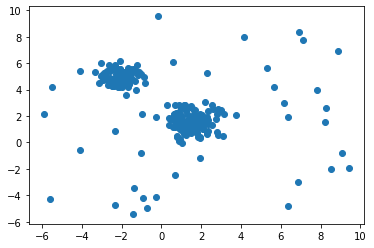

In [2]:
df = pd.read_csv('data_set_A.csv')

df.head()

x = df.values

plt.scatter(x[:,0], x[:,1])

## Model Training - [Unsupervised KNN](https://scikit-learn.org/stable/modules/neighbors.html)


In [8]:
nbrs = NearestNeighbors(n_neighbors=5)
nbrs.fit(x)
distances, indexes = nbrs.kneighbors(x)


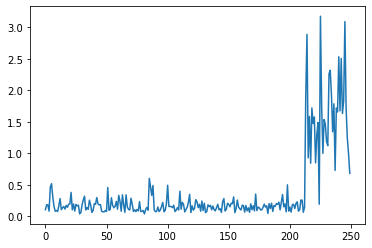

In [9]:
plt.plot(distances.mean(axis=1))

In [10]:
abn_ind = np.where(distances.mean(axis=1) > .5)

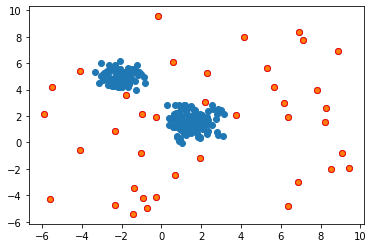

In [11]:
plt.scatter(x[:,0], x[:,1])
plt.scatter(x[abn_ind,0], x[abn_ind,1], edgecolors="r")

# time series data 


In [7]:
df_sen = pd.read_csv('sensors.csv', index_col='time')
df_sen.head()

,sensor1,sensor2,sensor3
time,,,
2020-04-01 00:00:00,0.248380,3.214768,12.313405
2020-04-01 00:01:00,2.258430,1.054156,11.453157
2020-04-01 00:02:00,4.834818,0.284641,10.082687
2020-04-01 00:03:00,5.058023,0.845871,9.870637
2020-04-01 00:04:00,6.888020,-2.019289,9.265985


In [8]:
df_sen.index = pd.to_datetime(df_sen.index)
type(df_sen.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [9]:
x = df_sen.values

nbrs = NearestNeighbors(n_neighbors=5, algorithm='ball_tree').fit(x)

distances, indices = nbrs.kneighbors(x)

df_sen['knn_health'] = distances.mean(axis=1)
plt.plot(df_sen['knn_health'])

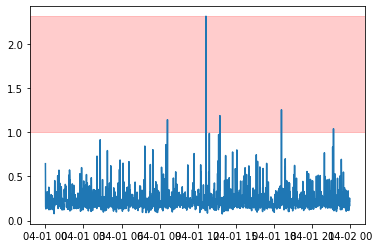

In [18]:
df_sen['knn_health'] = distances.mean(axis=1)
plt.plot(df_sen['knn_health'])
plt.axhspan(1, max(df_sen['knn_health']), alpha=0.2, color='red')